<a href="https://colab.research.google.com/github/Alialqaddy/-MNIST---Deep-Neural-Network-with-Keras/blob/main/MNIST_Deep_Neural_Network_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST - Deep Neural Network with Keras

1-necessary libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K



2- MNIST dataset


MNIST is a collection of handwritten digits ranging from the number 0 to 9.

It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.

To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically.

The following Keras code shows how to access MNIST dataset, plot 25 random samples, and count the number of labels for train and test datasets.

In [ ]:
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}

Test labels:  {np.uint8(0): np.int64(980), np.uint8(1): np.int64(1135), np.uint8(2): np.int64(1032), np.uint8(3): np.int64(1010), np.uint8(4): np.int64(982), np.uint8(5): np.int64(892), np.uint8(6): np.int64(958), np.uint8(7): np.int64(1028), np.uint8(8): np.int64(974), np.uint8(9): np.int64(1009)}


3-Data visualization

The following code will help to sample the 25 random MNIST digits and visualize them.

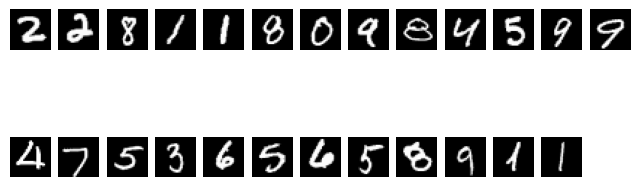

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(8,8))
for i in range(len(indexes)):
    plt.subplot(5,13,  i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

4- Designing model architecture using Keras :

The MLP model, discussed above can be used for MNIST digits classification.

When the units or perceptrons are exposed, the MLP model is a fully connected network.

The following code shows how to design the MLP model architecture using Keras.

The first step in designing the model architecture is to import the Keras layers. This can be done as follows:

4.1- Import Keras layers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

4.2- Compute the number of labels
Now, the data must be in the correct shape and format.

After loading the MNIST dataset, the number of labels is computed as:

In [ ]:
num_labels = len(np.unique(y_train))
print(f"{num_labels}")

10


4.3- One-Hot Encoding
At this point, the labels are in digits format, 0 to 9.

This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.

A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.

For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.

The following lines convert each label into a one-hot vector:

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

4.4 Data Preprocessing
In deep learning, data is stored in tensors. The term tensor applies to a scalar (0D tensor), vector (1D tensor), matrix (2D tensor), and a multi-dimensional tensor.

The rest code computes the image dimensions, input_size of the first Dense layer and scales each pixel value from 0 to 255 to range from 0.0 to 1.0. Although raw pixel values can be used directly, it is better to normalize the input data as to avoid large gradient values that could make training difficult.

The output of the network is also normalized. After training, there is an option to put everything back to the integer pixel values by multiplying the output tensor by 255.

The proposed model is based on MLP layers. Therefore, the input is expected to be a 1D tensor. So, x_train and x_test are reshaped to [60000, 28 28] and [10000, 28 28], respectively.

In [ ]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

4.5 Setting network parameters
Now, we will set the network parameters as follows:

In [ ]:
batch_size = 128
hidden_units = 256
dropout = 0.45

The batch_size argument indicates the number of data that we will use for each update of the model parameters.

Hidden_units shows the number of hidden units.

Dropout is the dropout rate (more on this in section 7 - Overfitting and Regularization).

________________________________________________________________________________________________________________________________________________________________

4.6 Designing the model architecture ¶
The next step is to design the model architecture. The proposed model is made of three MLP layers.

In Keras, an MLP layer is referred to as Dense, which stands for the densely connected layer.

Both the first and second MLP layers are identical in nature with 256 units each, followed by relu activation and dropout.

256 units are chosen since 128, 512 and 1,024 units have lower performance metrics. At 128 units, the network converges quickly, but has a lower test accuracy. The added number units for 512 or 1,024 does not increase the test accuracy significantly.

The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network.

The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers and can be created in the following way:

from keras.models import Sequential

model = Sequential()

The model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output.

In Keras, we can add the required types of layers through the add() method.

In [ ]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

Since a Dense layer is a linear operation, a sequence of Dense layers can only approximate a linear function.

The problem is that the MNIST digit classification is inherently a non-linear process. Inserting a relu activation between Dense layers will enable MLPs to model non-linear mappings.

relu or Rectified Linear Unit (ReLU) is a simple non-linear function. It allows positive inputs to pass through unchanged while clamping everything else to zero.

________________________________________________________________________________________________________________________________________________________________

4.7 View model summary
Keras library provides us summary() method to check the model description.

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

The above listing shows the model summary of the proposed network. It requires a total of 269,322 parameters.

This is substantial considering that we have a simple task of classifying MNIST digits. So, MLPs are not parameter efficient.

The total number of parameters required can be computed as follows:

From input to Dense layer: 784 × 256 + 256 = 200,960.

From first Dense to second Dense: 256 × 256 + 256 = 65,792.

From second Dense to the output layer: 10 × 256 + 10 = 2,570.

The total is 200,690 + 65,972 + 2,570 = 269,322.

________________________________________________________________________________________________________________________________________________________________

5. Implement MLP model using Keras ¶
Back to Table of Contents

The implementation of MLP model in Keras comprises of three steps:-

Compiling the model with the compile() method.

Training the model with fit() method.

Evaluating the model performance with evaluate() method.

For detailed discussion on implementation, please refer to my previous kernel Comprehensive Guide to ANN with Keras
5.1 Compile the model with compile() method
Compilation of model can be done as follows:

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Loss function (categorical_crossentropy)¶
How far the predicted tensor is from the one-hot ground truth vector is called loss.

In this example, we use categorical_crossentropy as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

There are other loss functions in Keras, such as mean_absolute_error and binary_crossentropy. The choice of the loss function is not arbitrary but should be a criterion that the model is learning.

For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The binary_crossentropy loss function is normally used after the sigmoid activation layer while mean_squared_error is an option for tanh output.

Optimization (optimizer adam)
With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output.

In Keras, there are several choices for optimizers. The most commonly used optimizers are; Stochastic Gradient Descent (SGD), Adaptive Moments (Adam) and Root Mean Squared Propagation (RMSprop).

Each optimizer features tunable parameters like learning rate, momentum, and decay.

Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

Metrics (accuracy)
Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss.

During training, validation, and testing, other metrics such as accuracy can also be included.

Accuracy is the percent, or fraction, of correct predictions based on ground truth.

________________________________________________________________________________________________________________________________________________________________

5.2 Train the model with fit() method

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7658 - loss: 0.7226
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9402 - loss: 0.2032
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9528 - loss: 0.1571
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9612 - loss: 0.1279
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9659 - loss: 0.1114
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9699 - loss: 0.0987
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9716 - loss: 0.0907
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9723 - loss: 0.0892
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9744 - loss: 0.0796
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9756 - loss: 0.0750
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9776 - loss: 0.0705
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 1

5.3 Evaluating model performance with evaluate() method

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9785 - loss: 0.0793

Test accuracy: 98.2%


7-Testing the Model on General Images

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving download (2).png to download (2) (2).png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The predicted number is: 6


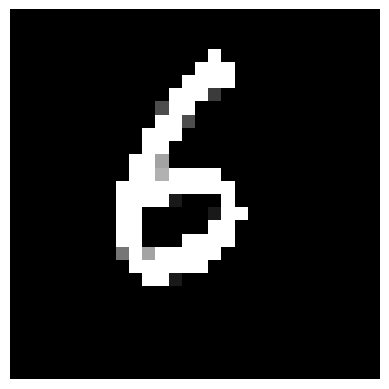

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image, ImageOps

# Load the image from Google (or any other source)
img_path = 'download (2).png'  # The name of the image you uploaded

# Load the image and convert it to 28x28 with grayscale (important)
img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")

# Invert the colors - making the numbers white and background black
img = ImageOps.invert(img)

# Convert the image to an array
img_array = img_to_array(img)

# Reshape the image to match the input shape for the neural network (28x28 into a flat array)
img_array = np.reshape(img_array, (1, 784))

# Convert the values to float32 and normalize by dividing by 255
img_array = img_array.astype('float32') / 255



# Make a prediction using the model
predicted_class = model.predict(img_array)

# Print the predicted result
predicted_label = np.argmax(predicted_class)  # Get the final prediction (the class the model predicts)
print(f"The predicted number is: {predicted_label}")

# Display the image that was used for prediction
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
